In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Data pulling
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
email_rec = pd.read_csv(url, header=None)

In [3]:
#Renaming the columns
email_rec.columns = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
                     "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
                     "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
                     "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
                     "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
                     "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
                     "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
                     "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
                     "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                     "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
                     "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
                     "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average",
                     "capital_run_length_longest", "capital_run_length_total", "spam"]


In [4]:
# 2. Data preprocessing
# Check dataset dimensions and types
print(email_rec.shape)
print(email_rec.info())

(4601, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report      

In [5]:
# Check for missing values
print(email_rec.isnull().sum())

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [6]:
# Look at fraction of spam emails
print(email_rec['spam'].value_counts(normalize=True))

spam
0    0.605955
1    0.394045
Name: proportion, dtype: float64


In [7]:
# Summary statistics of all columns
print(email_rec.describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

In [8]:
# Split into features (X) and target (y)
X = email_rec.drop("spam", axis=1)
y = email_rec["spam"]


In [9]:
# Scale the features
X = scale(X)


In [11]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
# Check distribution of spam in train and test sets
print(y_train.mean(), y_test.mean())



0.3978260869565217 0.38522809558291093


In [12]:
# 3. Model building
model = SVC(C=1)
model.fit(X_train, y_train)


SVC(C=1)

In [13]:
# Predictions
y_pred = model.predict(X_test)

In [14]:
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Confusion Matrix:
[[811  38]
 [ 61 471]]
Accuracy: 0.9283128167994207
Precision: 0.925343811394892
Recall: 0.8853383458646616


In [15]:
# Specificity calculation
cm = metrics.confusion_matrix(y_test, y_pred)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Specificity:", specificity)

Specificity: 0.9552414605418139


In [16]:
# K-Fold Cross Validation
folds = KFold(n_splits=5, shuffle=True, random_state=4)
cv_results = cross_val_score(model, X_train, y_train, cv=folds, scoring='accuracy')
print("Cross-validation results:", cv_results)
print("Mean accuracy:", cv_results.mean())

Cross-validation results: [0.91770186 0.94099379 0.92080745 0.93012422 0.93944099]
Mean accuracy: 0.9298136645962731


In [17]:
# Grid Search for optimal C
params = {"C": [0.1, 1, 10, 100, 1000]}
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=folds, verbose=1, return_train_score=True)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(C=1), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [19]:
# Results of Grid Search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
print(cv_results)



   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.421712      0.040472         0.158519        0.015373     0.1   
1       0.191538      0.022133         0.055475        0.016600       1   
2       0.235408      0.005526         0.067537        0.003932      10   
3       0.208619      0.033117         0.035023        0.001892     100   
4       0.265451      0.034811         0.031276        0.001384    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 0.1}           0.895963           0.902174           0.906832   
1     {'C': 1}           0.917702           0.940994           0.920807   
2    {'C': 10}           0.908385           0.944099           0.933230   
3   {'C': 100}           0.913043           0.927019           0.936335   
4  {'C': 1000}           0.908385           0.931677           0.922360   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.90217

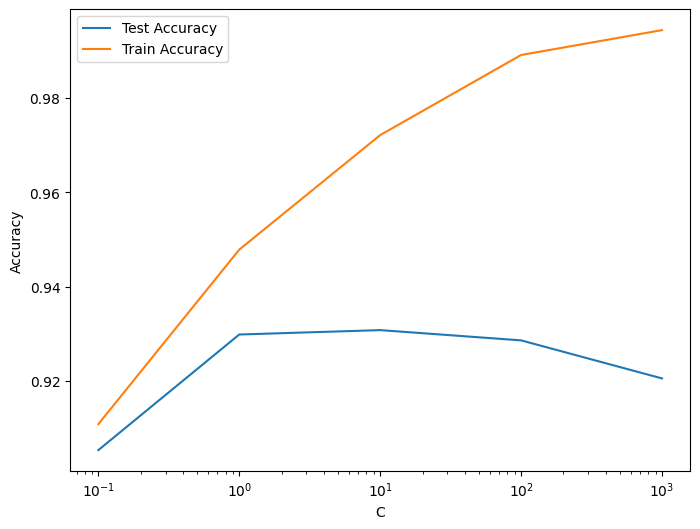

In [20]:
# Plot C vs Accuracy
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'], label='Test Accuracy')
plt.plot(cv_results['param_C'], cv_results['mean_train_score'], label='Train Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.show()

In [21]:
# Best parameters from Grid Search
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print("Best score:", best_score)
print("Best C:", best_C)

Best score: 0.9307453416149067
Best C: 10


In [24]:
# Train final model with best C
final_model = SVC(C=best_C)
final_model.fit(X_train, y_train)
final_y_pred = final_model.predict(X_test)
# Final evaluation
print("Final Model Evaluation")
print("Accuracy:", metrics.accuracy_score(y_test, final_y_pred))
print("Precision:", metrics.precision_score(y_test, final_y_pred))
print("Recall:", metrics.recall_score(y_test, final_y_pred))

Final Model Evaluation
Accuracy: 0.9304851556842868
Precision: 0.9241245136186771
Recall: 0.8928571428571429


In [25]:
# Optimizing for other evaluation metrics
scores = ['accuracy', 'precision', 'recall']
for score in scores:
    print(f"Tuning hyper-parameters for {score}")
    clf = GridSearchCV(SVC(), params, cv=folds, scoring=score, return_train_score=True)
    clf.fit(X_train, y_train)
    print(f"Best {score} score:", clf.best_score_)
    print(f"Best parameters for {score}:", clf.best_params_)
    print("\n")

Tuning hyper-parameters for accuracy
Best accuracy score: 0.9307453416149067
Best parameters for accuracy: {'C': 10}


Tuning hyper-parameters for precision
Best precision score: 0.9373311086391073
Best parameters for precision: {'C': 0.1}


Tuning hyper-parameters for recall
Best recall score: 0.8987270122310326
Best parameters for recall: {'C': 10}


